 # This notebook will cover 
 
 ## 1) Linear grammars, illustrated by defining a fresh NFA and converting it into a CFG, and simulating it via a PDA
 
 ## 2) Ambiguity and inherent ambiguity, again illustrated via a PDA that encodes such a language
 
 # These exercises will be featured in the Quiz-7

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --

from jove.SystemImports import *
from jove.DotBashers    import *

from jove.Def_NFA       import *
from jove.Def_DFA       import *
from jove.Def_RE2NFA    import *

from jove.Def_md2mc     import *
from jove.Def_PDA       import *
from jove.AnimatePDA    import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 6043, done.
remote: Counting objects: 100% (1409/1409), done.
remote: Compressing objects: 100% (595/595), done.
remote: Total 6043 (delta 814), reused 1345 (delta 759), pack-reused 4634
Receiving objects: 100% (6043/6043), 9.16 MiB | 19.96 MiB/s, done.
Resolving deltas: 100% (3819/3819), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(flTup)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
he

# A CFG with purely right-linear productions is equivalent to an NFA

### Let us illustrate this by converting an NFA to a CFG that has a linear grammar. To make things more interesting, we pick a slight variant of a language seen before: ``IF there is a second-last position THEN that must be a 1``

## For practice, I'll let you write a compact RE for it below; I'll just provide the NFA

Got a Jove markdown comment
Got a Jove markdown comment
Got one label of a *FA, which is an ID, that being 0
Got one label of a *FA, which is an ID, that being 1
Parsed one line of Jove MD code, involving tokens COLON and ARROWS and other things in an MD line
Got one label of a *FA, which is an ID, that being 
Parsed one line of Jove MD code, involving tokens COLON and ARROWS and other things in an MD line
Got one label of a *FA, which is an ID, that being 1
Parsed one line of Jove MD code, involving tokens COLON and ARROWS and other things in an MD line
Got one label of a *FA, which is an ID, that being 0
Got one label of a *FA, which is an ID, that being 1
Parsed one line of Jove MD code, involving tokens COLON and ARROWS and other things in an MD line
Got one label of a *FA, which is an ID, that being 0
Got one label of a *FA, which is an ID, that being 1
Parsed one line of Jove MD code, involving tokens COLON and ARROWS and other things in an MD line
Parsing an NFA description


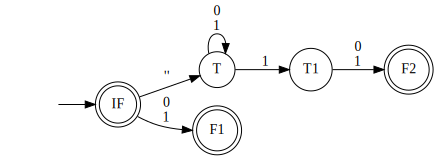

In [32]:
nfa_if_sndlast_then_1 = md2mc('''
NFA
!! Read the name of the NFA as
!! "IF there is a second-last position THEN that must be a 1"
 
IF : 0|1    -> F1
IF : ''     -> T
T  : 1      -> T1
T  : 0|1    -> T
T1 : 0|1    -> F2
''')

dotObj_nfa(nfa_if_sndlast_then_1, FuseEdges=True)

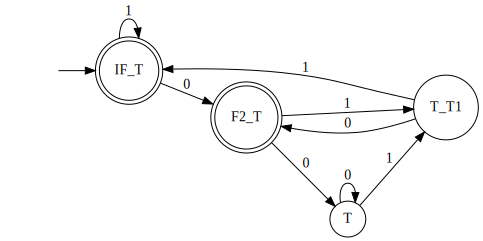

In [3]:
dfa_if_sndlast_then_1 = min_dfa(nfa2dfa(nfa_if_sndlast_then_1))
dotObj_dfa(dfa_if_sndlast_then_1, FuseEdges=True)

 # Write an RE and make sure that agrees!
 
 # **GIVEN TO YOU FOR EXTRA PRACTICE WRITING RE**
 
 ## Will be a quiz question

Generating LALR tables


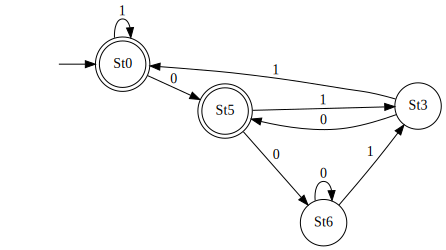

In [29]:
# Let's be absolutely sure we got the right DFA

RE_for_this_nfa =  "(''+0+1+(0+1)*1(0+1))"  # <<====== WRITE THIS RE !!!!

dfaRE_if_sndlast_then_1 = min_dfa(nfa2dfa(re2nfa(RE_for_this_nfa)))
dotObj_dfa(dfaRE_if_sndlast_then_1, FuseEdges=True)

In [30]:
iso_dfa(dfa_if_sndlast_then_1, dfaRE_if_sndlast_then_1)

True

## Repeat the NFA to be "closer" to the CFG/PDA

Got a Jove markdown comment
Got a Jove markdown comment
Got one label of a *FA, which is an ID, that being 0
Got one label of a *FA, which is an ID, that being 1
Parsed one line of Jove MD code, involving tokens COLON and ARROWS and other things in an MD line
Got one label of a *FA, which is an ID, that being 
Parsed one line of Jove MD code, involving tokens COLON and ARROWS and other things in an MD line
Got one label of a *FA, which is an ID, that being 1
Parsed one line of Jove MD code, involving tokens COLON and ARROWS and other things in an MD line
Got one label of a *FA, which is an ID, that being 0
Got one label of a *FA, which is an ID, that being 1
Parsed one line of Jove MD code, involving tokens COLON and ARROWS and other things in an MD line
Got one label of a *FA, which is an ID, that being 0
Got one label of a *FA, which is an ID, that being 1
Parsed one line of Jove MD code, involving tokens COLON and ARROWS and other things in an MD line
Parsing an NFA description


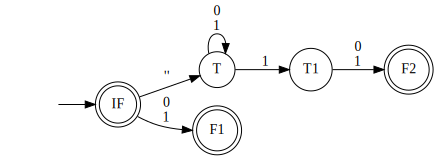

In [31]:
nfa_if_sndlast_then_1 = md2mc('''
NFA
!! Read the name of the NFA as
!! "IF there is a second-last position THEN that must be a 1"

IF : 0|1    -> F1
IF : ''     -> T
T  : 1      -> T1
T  : 0|1    -> T
T1 : 0|1    -> F2
''')
 
dotObj_nfa(nfa_if_sndlast_then_1, FuseEdges=True)

# Let's obtain a CFG directly from nfa_if_sndlast_then_1 and render as a PDA

## NOTE: I've not asked you many specific questions with respect to this NFA to PDA conversion. However, you are urged to study exactly how this conversion is done (and not just run the cells w/o observing things). This may be asked during Midterm-2. By studying these details now, you'll be saving time during Midterm-2.

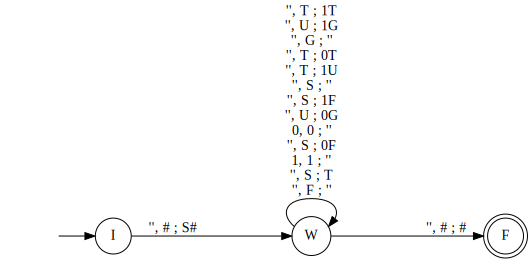

In [7]:
pda_if_sndlast_then_1 = md2mc('''
PDA

!! WE NOW DERIVE THE LINEAR GRAMMAR
!! ============================================================================
!! First we will convert directly, by taking NFA states to be nonterminal names
!! Then we will convert it over to one-letter nonterminals 

!! IF -> ''           -- because "IF" is an initial and final
!! IF -> 1 F1 | 0 F1  -- because IF jumps to F1 upon 0 or 1
!! F1 -> ''           -- because F1 is also a final

!! IF ->  T           -- because of IF jumping to T upon ''
!! T  -> 0 T | 1 T    -- because of T's self-loop

!! T  -> 1 T1         -- because of T's transition to T1

!! T1 -> 0 F2 | 1 F2  -- because of T1's transitions

!! F2 -> ''           -- because F2 is final

!! =============================================================================

!! REMEMBER THAT JOVE's grammar simulation via PDA needs one-letter non-terminals
!! IF => S ; F1 => F ; F2 -> G ; T => T ; T1 => U
!! So we apply these renamings to obtain the grammar below:

!! S -> ''            
!! S -> 1 F | 0 F    
!! F -> ''            

!! S ->  T          
!! T  -> 0 T | 1 T     

!! T  -> 1 U

!! U -> 0 G | 1 G   

!! G -> ''            
 
!! =============================================================================
!! Now a PDA based on the above

!!-- standard transitions!
I : '',#; S# -> W
W : '',#; #  -> F
!!-- Sigma-based transitions
W : 0,0; '' -> W
W : 1,1; '' -> W

!!==== Now, CFG rules translated below to PDA rules, one by one ====

!! S -> ''  
W : '',S; '' -> W

!! S -> 1 F 
W : '',S ; 1F -> W

!! S -> 0 F
W : '',S ; 0F -> W

!! F -> ''         
W : '',F; '' -> W

!! S  -> T      
W : '',S; T  -> W

!! T  -> 0 T   
W : '',T; 0T -> W

!! T  -> 1 T
W : '',T; 1T -> W

!! T  -> 1 U
W : '',T; 1U -> W

!! U -> 0 G 
W : '',U; 0G -> W

!! U -> 1 G   
W : '',U; 1G -> W

!! G -> ''  
W : '',G; '' -> W
 

''')

dotObj_pda(pda_if_sndlast_then_1, FuseEdges=True)

In [8]:
help(explore_pda)

Help on function explore_pda in module jove.Def_PDA:

explore_pda(inp, P, acceptance='ACCEPT_F', STKMAX=6, chatty=False)
    A handy routine to print the result of run_pda plus making 
    future extensions to explore run-results.



In [9]:
explore_pda('', pda_if_sndlast_then_1)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '', '#')
->  ('W', '', 'S#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [10]:
explore_pda('0', pda_if_sndlast_then_1)

String 0 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0', '#')
->  ('W', '0', 'S#')
->  ('W', '0', '0F#')
->  ('W', '', 'F#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [11]:
explore_pda('1', pda_if_sndlast_then_1)

String 1 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1', '#')
->  ('W', '1', 'S#')
->  ('W', '1', '1F#')
->  ('W', '', 'F#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [12]:
explore_pda('10', pda_if_sndlast_then_1)

String 10 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '10', '#')
->  ('W', '10', 'S#')
->  ('W', '10', 'T#')
->  ('W', '10', '1U#')
->  ('W', '0', 'U#')
->  ('W', '0', '0G#')
->  ('W', '', 'G#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [13]:
explore_pda('01', pda_if_sndlast_then_1)

String 01 rejected by your PDA :-(
Visited states are:
{('F', '1', '#'), ('W', '01', 'S#'), ('W', '', '0G#'), ('W', '', 'U#'), ('W', '01', '#'), ('W', '1', '0T#'), ('W', '1', 'T#'), ('W', '', '1U#'), ('W', '', '1G#'), ('W', '01', '1T#'), ('W', '1', '1U#'), ('W', '1', 'F#'), ('F', '01', '#'), ('W', '01', '0T#'), ('W', '1', '#'), ('W', '01', '0F#'), ('W', '01', '1F#'), ('W', '1', '1T#'), ('W', '01', 'T#'), ('I', '01', '#'), ('W', '', '0T#'), ('W', '', '1T#'), ('W', '', 'T#'), ('W', '01', '1U#')}


In [14]:
explore_pda('1001010', pda_if_sndlast_then_1)

String 1001010 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1001010', '#')
->  ('W', '1001010', 'S#')
->  ('W', '1001010', 'T#')
->  ('W', '1001010', '1T#')
->  ('W', '001010', 'T#')
->  ('W', '001010', '0T#')
->  ('W', '01010', 'T#')
->  ('W', '01010', '0T#')
->  ('W', '1010', 'T#')
->  ('W', '1010', '1T#')
->  ('W', '010', 'T#')
->  ('W', '010', '0T#')
->  ('W', '10', 'T#')
->  ('W', '10', '1U#')
->  ('W', '0', 'U#')
->  ('W', '0', '0G#')
->  ('W', '', 'G#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [15]:
explore_pda('100100', pda_if_sndlast_then_1)

String 100100 rejected by your PDA :-(
Visited states are:
{('W', '00', '1T#'), ('W', '100', '1U#'), ('W', '', '1U#'), ('W', '100100', '1U#'), ('W', '0100', 'T#'), ('W', '00100', '#'), ('W', '100', '0T#'), ('W', '0', 'G#'), ('W', '100100', '1F#'), ('W', '0100', '#'), ('W', '00100', 'T#'), ('W', '00100', '1T#'), ('W', '0100', '1T#'), ('W', '00', '1U#'), ('W', '0', '0T#'), ('W', '00', '0G#'), ('W', '00', 'U#'), ('W', '100100', '0T#'), ('W', '100100', '1T#'), ('W', '100100', 'T#'), ('F', '0100', '#'), ('F', '0', '#'), ('W', '00100', '0G#'), ('W', '00100', 'U#'), ('W', '00100', '1G#'), ('F', '00100', '#'), ('W', '00100', '1U#'), ('W', '00100', 'F#'), ('W', '00100', '0T#'), ('W', '100100', 'S#'), ('W', '100', 'T#'), ('W', '0100', 'G#'), ('W', '100100', '0F#'), ('W', '0', '1T#'), ('W', '0100', '0T#'), ('W', '0', 'T#'), ('W', '0', '#'), ('W', '0100', '1U#'), ('W', '00', '1G#'), ('W', '100', '1T#'), ('I', '100100', '#'), ('F', '100100', '#'), ('W', '0', '1U#'), ('W', '00', 'T#'), ('W', '100100

In [16]:
AnimatePDA(pda_if_sndlast_then_1, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

# Reverse the CFG to obtain a purely left-linear grammar
## Then express the CFG as a PDA

## NOTE: I've not asked you many specific questions with respect to reversing this CFG and obtaining a purely left-linear grammar. However, you are urged to study exactly how this conversion is done (and not just run the cells w/o observing things). This may be asked during Midterm-2. By studying these details now, you'll be saving time during Midterm-2.

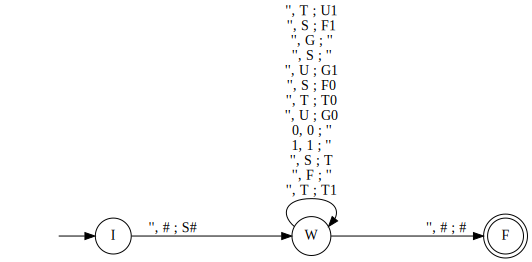

In [17]:
pda_rev = md2mc('''

PDA     

!! =============================================================================
!! We will reverse production-by-production, keeping the same name for the nonterminals!

I : '',#; S# -> W
W : '',#; #  -> F

!!-- Sigma-based transitions
W : 0,0; '' -> W
W : 1,1; '' -> W

!!==== Now, CFG rules for reversed productions ====

!! S -> ''  
W : '',S; '' -> W

!! S -> 1 F ===REVERSED===> S -> F 1
W : '',S ; F1 -> W

!! S -> 0 F ===REVERSED===> S -> F 0
W : '',S ; F0 -> W

!! F -> '' ===REVERSED===> F -> ''        
W : '',F; '' -> W

!! S  -> T ===REVERSED===> S -> T   
W : '',S; T  -> W

!! T  -> 0 T ===REVERSED===> T -> T 0  
W : '',T; T0 -> W
 
!! T  -> 1 T ===REVERSED===> T -> T 1
W : '',T; T1 -> W

!! T  -> 1 U ===REVERSED===> T -> U 1
W : '',T; U1 -> W

!! U -> 0 G ===REVERSED===> U -> G 0
W : '',U; G0 -> W

!! U -> 1 G ===REVERSED===> U -> G 1   
W : '',U; G1 -> W

!! G -> ''  ===REVERSED===> G -> ''
W : '',G; '' -> W
 

''')

dotObj_pda(pda_rev, FuseEdges=True)

In [18]:
explore_pda('', pda_rev)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '', '#')
->  ('W', '', 'S#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [19]:
explore_pda('0', pda_rev)

String 0 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0', '#')
->  ('W', '0', 'S#')
->  ('W', '0', 'F0#')
->  ('W', '0', '0#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [20]:
explore_pda('1', pda_rev)

String 1 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1', '#')
->  ('W', '1', 'S#')
->  ('W', '1', 'F1#')
->  ('W', '1', '1#')
->  ('W', '', '#')
->  ('F', '', '#') .


# Reversed PDA works but needs STKMAX = 9

In [21]:
# REVERSE THIS TEST:  explore_pda('1001010', pda_if_sndlast_then_1)

explore_pda('0101001', pda_rev, STKMAX=9)

String 0101001 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0101001', '#')
->  ('W', '0101001', 'S#')
->  ('W', '0101001', 'T#')
->  ('W', '0101001', 'T1#')
->  ('W', '0101001', 'T01#')
->  ('W', '0101001', 'T001#')
->  ('W', '0101001', 'T1001#')
->  ('W', '0101001', 'T01001#')
->  ('W', '0101001', 'U101001#')
->  ('W', '0101001', 'G0101001#')
->  ('W', '0101001', '0101001#')
->  ('W', '101001', '101001#')
->  ('W', '01001', '01001#')
->  ('W', '1001', '1001#')
->  ('W', '001', '001#')
->  ('W', '01', '01#')
->  ('W', '1', '1#')
->  ('W', '', '#')
->  ('F', '', '#') .


# Rejects up to stack depth of 12

In [22]:
# REVERSE THIS TEST:  explore_pda('1001000', pda_if_sndlast_then_1)

explore_pda('0001001', pda_rev, STKMAX=12)

String 0001001 rejected by your PDA :-(
Visited states are:
{('W', '0001001', '1101001100#'), ('W', '0001001', 'T1000001#'), ('W', '0001001', 'T0101000#'), ('W', '0001001', 'U1101001011#'), ('W', '0001001', 'T0100100101#'), ('W', '0001001', 'U100010000#'), ('W', '0001001', 'G0110000001#'), ('W', '0001001', 'U1011111#'), ('W', '001001', '111110101#'), ('W', '0001001', 'G1101101111#'), ('W', '0001001', 'T0101111101#'), ('W', '0001001', 'T011011011#'), ('W', '0001001', '1100001010#'), ('W', '0001001', '011011010#'), ('W', '0001001', 'G01110100#'), ('W', '0001001', 'T01110#'), ('W', '0001001', 'T1000011101#'), ('W', '0001001', 'T000000000#'), ('W', '0001001', 'G11101#'), ('W', '0001001', 'G0110101000#'), ('W', '0001001', 'G0110010001#'), ('W', '0001001', 'T0010111011#'), ('W', '0001001', 'G11000101#'), ('W', '0001001', 'G0111100010#'), ('W', '001001', '110010111#'), ('W', '0001001', 'U1010100001#'), ('W', '0001001', '1101011011#'), ('W', '0001001', 'U1011000#'), ('W', '0001001', '110110100

In [23]:
AnimatePDA(pda_rev, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

# Now for an inherently ambiguous language

## $\{ a^i b^j c^k \; : \; (i=j)\; \vee \; (j=k) \}$

## No CFG can avoid ambiguity! 

## Let's try a CFG just for illustration

## NOTE: I've not asked you many specific questions with respect to encoding this language using a CFG. But again, you are urged to study it well (and not just run the cells w/o observing things), to save time for Midterm-2.

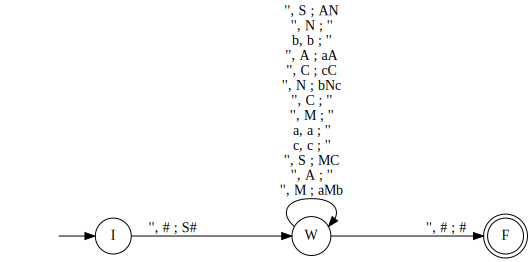

In [24]:
pda_inh_amb = md2mc('''PDA

!!---
!! 
!!   where M is "match a/b" and N is "match b/c"
!!   and C means any number of Cs, and A means any number of As
!!
!! S -> M C |  A N    
!!
!! M -> a M b | ''
!! C -> c C   | ''

!! N -> b N c | ''
!! A -> a A   | ''
!!
!!---

!!-- Transitions for the CFG rules


!! S -> M C |  A N 

W : '',S; MC -> W
W : '',S; AN -> W


!! M -> a M b | ''
W : '',M; aMb -> W
W : '',M; ''  -> W


!! C -> c C   | ''
W : '',C; cC  -> W
W : '',C; ''  -> W

!! N -> b N C | ''
W : '',N; bNc -> W
W : '',N; ''  -> W

!! A -> a A   | ''
W : '',A; aA  -> W
W : '',A; ''  -> W


!!-- Standard transitions for CFG 2 PDA
I : '',#; S# -> W
W : '',#; #  -> F

!!-- Transitions for Sigma
W : a,a; '' -> W
W : b,b; '' -> W
W : c,c; '' -> W

 


''')

DO_pda_inh_amb = dotObj_pda(pda_inh_amb, FuseEdges=True)
DO_pda_inh_amb

In [25]:
explore_pda('abc', pda_inh_amb)

String abc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'abc', '#')
->  ('W', 'abc', 'S#')
->  ('W', 'abc', 'AN#')
->  ('W', 'abc', 'aAN#')
->  ('W', 'bc', 'AN#')
->  ('W', 'bc', 'N#')
->  ('W', 'bc', 'bNc#')
->  ('W', 'c', 'Nc#')
->  ('W', 'c', 'c#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'abc', '#')
->  ('W', 'abc', 'S#')
->  ('W', 'abc', 'MC#')
->  ('W', 'abc', 'aMbC#')
->  ('W', 'bc', 'MbC#')
->  ('W', 'bc', 'bC#')
->  ('W', 'c', 'C#')
->  ('W', 'c', 'cC#')
->  ('W', '', 'C#')
->  ('W', '', '#')
->  ('F', '', '#') .


In [26]:
AnimatePDA(pda_inh_amb, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

# A chatty parser for PDA will parse pda_inh_amb now !!

## You are urged to read the code of Jove/jove/Def_md2mc_chatty carefully with respect to how the parser is designed (and not just run the cells w/o observing things). Things with respect to this CFG are game for me to ask in Midterm-2.

In [27]:
from jove.Def_md2mc_chatty     import *

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)



Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got a Jove markdown comment
Got one label of a *FA, which is an ID, that being 
Got one label of a *FA, which is an ID, that being S
Got one label of a *FA, which is an ID, that being MC
Parsed one line of Jove MD code, involving tokens COLON and ARROWS and other things in an MD line
Got one label of a *FA, which is an ID, that being 
Got one label of a *FA, which is an ID, that being S
Got one label of a *FA, which is an ID, that being AN
Got a Jove markdown comment
Parsed one line of Jove MD code, involving tokens COLON and ARROWS and other things in an MD line
Got one label of a *FA, which is an ID

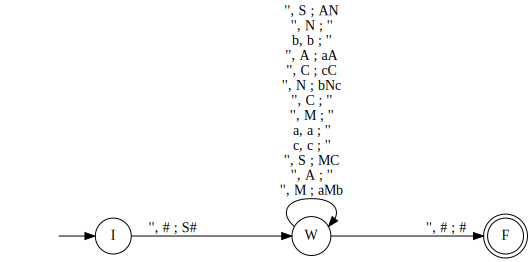

In [33]:
pda_inh_amb = md2mc('''PDA

!!---
!! 
!!   where M is "match a/b" and N is "match b/c"
!!   and C means any number of Cs, and A means any number of As
!!
!! S -> M C |  A N    
!!
!! M -> a M b | ''
!! C -> c C   | ''

!! N -> b N c | ''
!! A -> a A   | ''
!!
!!---

!!-- Transitions for the CFG rules


!! S -> M C |  A N 

W : '',S; MC -> W
W : '',S; AN -> W


!! M -> a M b | ''
W : '',M; aMb -> W
W : '',M; ''  -> W


!! C -> c C   | ''
W : '',C; cC  -> W
W : '',C; ''  -> W

!! N -> b N C | ''
W : '',N; bNc -> W
W : '',N; ''  -> W

!! A -> a A   | ''
W : '',A; aA  -> W
W : '',A; ''  -> W


!!-- Standard transitions for CFG 2 PDA
I : '',#; S# -> W
W : '',#; #  -> F

!!-- Transitions for Sigma
W : a,a; '' -> W
W : b,b; '' -> W
W : c,c; '' -> W

 


''')

DO_pda_inh_amb = dotObj_pda(pda_inh_amb, FuseEdges=True)
DO_pda_inh_amb